# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [15]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [16]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 619


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [34]:
# Set the API base URL
    # I am trying to define parameters for API from airport class exercise
#params = {
 #   "apiKey": weather_api_key,
  #  "format":"json"
#}

#base_url = "http://api.openweathermap.org/data/2.5/weather?"

base_url = f"https://api.openweathermap.org/data/2.5/weather?units=metric&appid={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    query_url = base_url + "&q=" + city
    #city_url = 
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(query_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | arlit
Processing Record 2 of Set 1 | kapaa
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | port alfred
Processing Record 5 of Set 1 | jamestown
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | mar del plata
Processing Record 8 of Set 1 | longyearbyen
Processing Record 9 of Set 1 | raudeberg
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | kununurra
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | chhatapur
Processing Record 14 of Set 1 | praia da vitoria
Processing Record 15 of Set 1 | puerto ayora
Processing Record 16 of Set 1 | berdigestyakh
Processing Record 17 of Set 1 | yellowknife
Processing Record 18 of Set 1 | hobart
Processing Record 19 of Set 1 | tiksi
Processing Record 20 of Set 1 | hami
Processing Record 21 of Set 1 | busselton
Processing Record 22 of Set 1 | cabo san lucas
Processing Record 23 of 

In [31]:
base_url = f"https://api.openweathermap.org/data/2.5/weather?units=metric&appid={weather_api_key}"
query_url = base_url + "&q=" + cities[0]
city_weather = requests.get(query_url).json()

print(json.dumps(city_weather, indent= 4, sort_keys= True))

{
    "base": "stations",
    "clouds": {
        "all": 5
    },
    "cod": 200,
    "coord": {
        "lat": 18.7369,
        "lon": 7.3853
    },
    "dt": 1681277486,
    "id": 2447513,
    "main": {
        "feels_like": 23.09,
        "grnd_level": 964,
        "humidity": 17,
        "pressure": 1012,
        "sea_level": 1012,
        "temp": 24.17,
        "temp_max": 24.17,
        "temp_min": 24.17
    },
    "name": "Arlit",
    "sys": {
        "country": "NE",
        "sunrise": 1681276552,
        "sunset": 1681321583
    },
    "timezone": 3600,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01d",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 99,
        "gust": 5.16,
        "speed": 3.74
    }
}


In [35]:
# Convert the cities weather data into a Pandas DataFrame            
city_data_df = pd.DataFrame(city_data)
city_data_df

# Show Record Count
city_data_df.count()

City          571
Lat           571
Lng           571
Max Temp      571
Humidity      571
Cloudiness    571
Wind Speed    571
Country       571
Date          571
dtype: int64

In [36]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,arlit,18.7369,7.3853,24.17,17,5,3.74,NE,1681277486
1,kapaa,22.0752,-159.3190,25.99,86,100,8.23,US,1681277648
2,albany,42.6001,-73.9662,17.38,49,98,6.29,US,1681277402
3,port alfred,-33.5906,26.8910,15.41,65,87,2.38,ZA,1681277650
4,jamestown,42.0970,-79.2353,16.77,44,0,4.63,US,1681277650


In [38]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [39]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,arlit,18.7369,7.3853,24.17,17,5,3.74,NE,1681277486
1,kapaa,22.0752,-159.3190,25.99,86,100,8.23,US,1681277648
2,albany,42.6001,-73.9662,17.38,49,98,6.29,US,1681277402
3,port alfred,-33.5906,26.8910,15.41,65,87,2.38,ZA,1681277650
4,jamestown,42.0970,-79.2353,16.77,44,0,4.63,US,1681277650


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

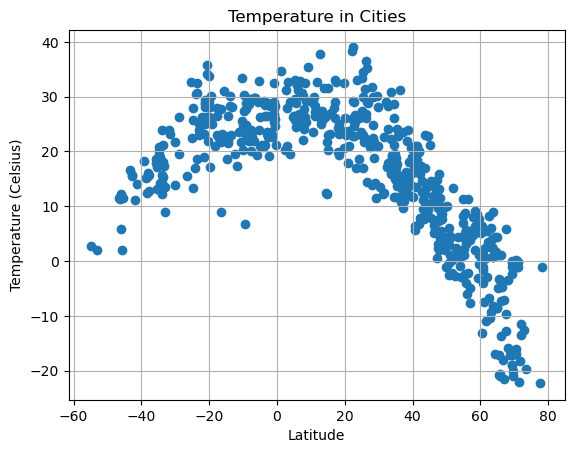

In [47]:
# Build scatter plot for latitude vs. temperature
#x_values = city_data_df['Lat']
#y_values = city_data_df['Max Temp']
#plt.scatter(x_values,y_values)
#plt.title("Temperature in Cities")
#plt.xlabel('Latitude')
#plt.ylabel('Temperature')
#plt.show()

plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title("Temperature in Cities")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

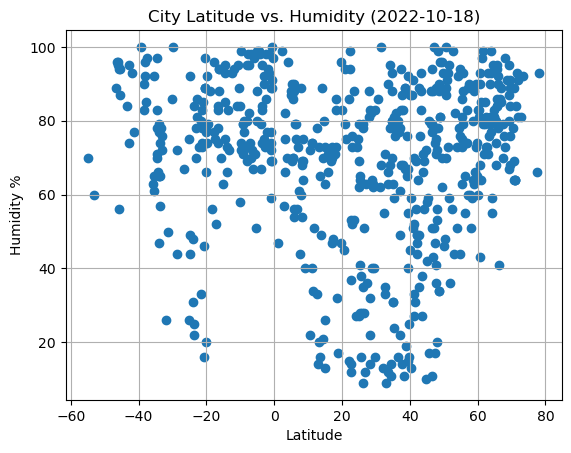

In [45]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.ylabel("Humidity %")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

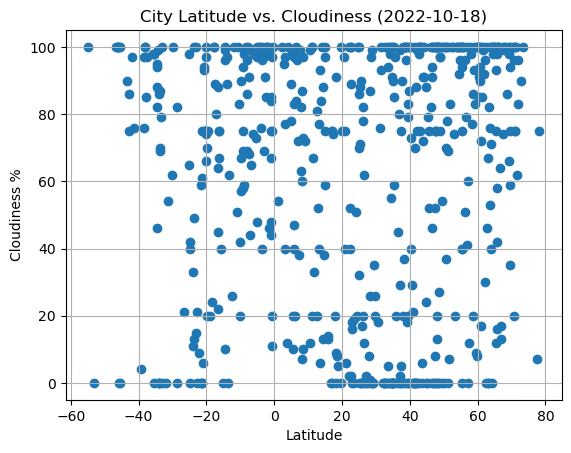

In [48]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.ylabel("Cloudiness %")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

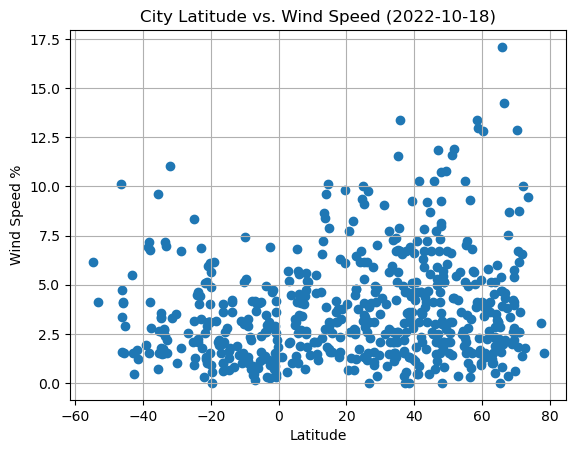

In [49]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"],marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.ylabel("Wind Speed %")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
x_values = city_data_df
Y_values = city_data_df

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

In [57]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,arlit,18.7369,7.3853,24.17,17,5,3.74,NE,1681277486
1,kapaa,22.0752,-159.3190,25.99,86,100,8.23,US,1681277648
2,albany,42.6001,-73.9662,17.38,49,98,6.29,US,1681277402
4,jamestown,42.0970,-79.2353,16.77,44,0,4.63,US,1681277650
7,longyearbyen,78.2186,15.6401,-1.09,93,75,1.54,SJ,1681277652


In [58]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,port alfred,-33.5906,26.8910,15.41,65,87,2.38,ZA,1681277650
5,rikitea,-23.1203,-134.9692,24.99,70,100,4.43,PF,1681277409
6,mar del plata,-38.0023,-57.5575,16.01,92,100,4.12,AR,1681277643
9,mataura,-46.1927,168.8643,11.38,96,100,1.59,NZ,1681277654
10,kununurra,-15.7667,128.7333,30.99,70,40,2.57,AU,1681277655


###  Temperature vs. Latitude Linear Regression Plot

R squared: 0.7745396047626243


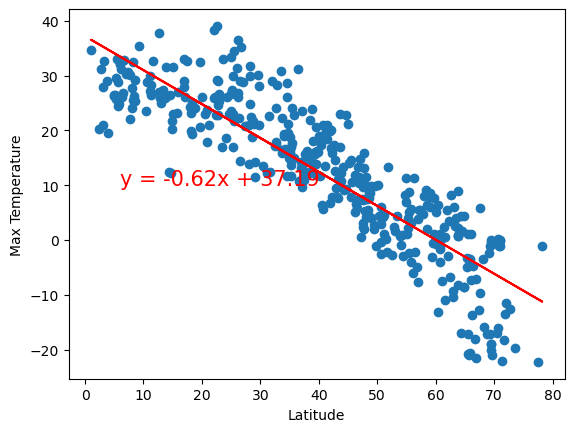

In [60]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"].astype("float")
y_values = northern_hemi_df["Max Temp"].astype("float")

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

R squared: 0.42378342238395095


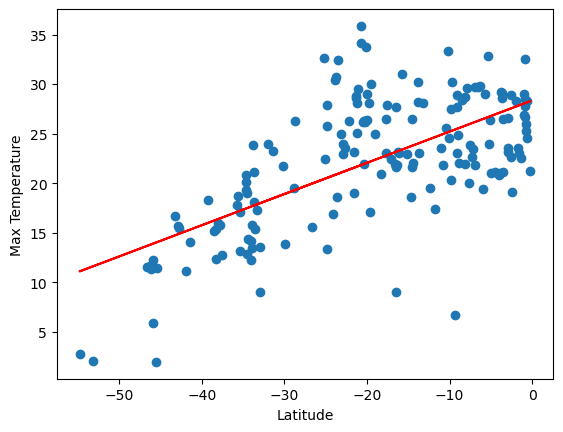

In [61]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"].astype("float")
y_values = southern_hemi_df["Max Temp"].astype("float")

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** 
## RESPONSE:
A scatter plot was created by randomly selecting cities from the Northern and Southern hemispheres, mapping their temperatures against their latitudes.

The plot showed a clear relationship between the distance of the cities from the equator and their temperatures. Specifically, the cities closer to the equator had higher temperatures, while those farther away had lower temperatures.

Also, the R value especially on Northern Hemisphere reflects strong corelation between Temperatures vs Latitude close to equator.

### Humidity vs. Latitude Linear Regression Plot

R squared: 0.07079695361928566


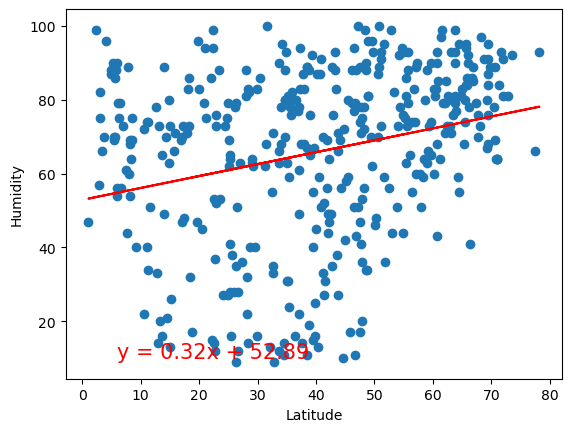

In [63]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"].astype("float")
y_values = northern_hemi_df["Humidity"].astype("float")

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

R squared: 0.014521426960432243


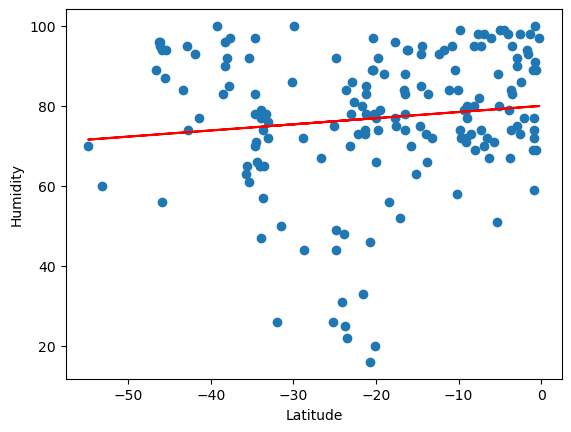

In [64]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"].astype("float")
y_values = southern_hemi_df["Humidity"].astype("float")

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** 
## RESPONSE:
A scatter plot was created by randomly selecting cities from the Northern and Southern hemispheres, mapping their humidity levels against their latitudes. 

The plot showed that there was no observable relationship between the latitude of the cities and their humidity levels. In other words, there was no correlation between the two variables.

Also, the R value on both Northern and Southern Hemisphere reflects no corelation between Humidity vs Latitude close to equator.

### Cloudiness vs. Latitude Linear Regression Plot

R squared: 0.033393610705794066


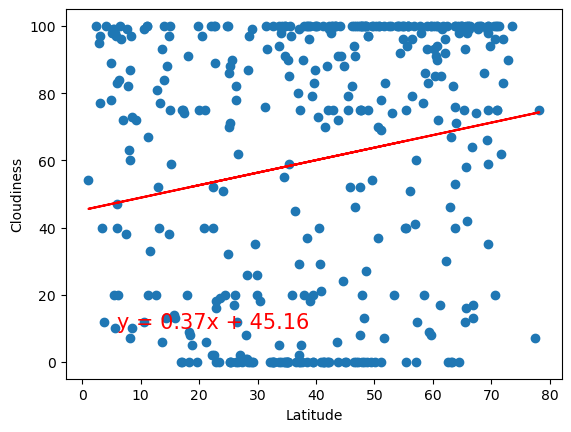

In [65]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"].astype("float")
y_values = northern_hemi_df["Cloudiness"].astype("float")

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

R squared: 0.012836974043398598


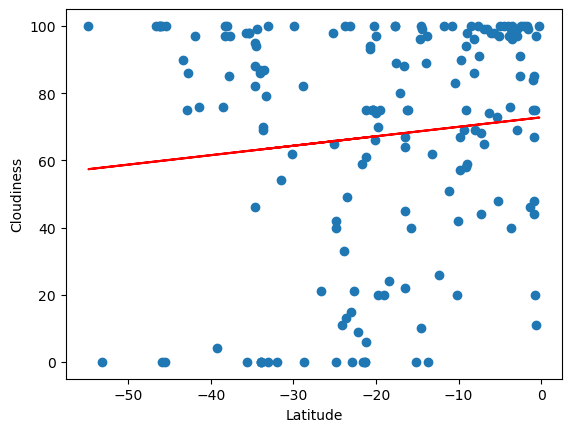

In [66]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"].astype("float")
y_values = southern_hemi_df["Cloudiness"].astype("float")

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** 
## RESPONSE:
A scatter plot was created by randomly selecting cities from the Northern and Southern hemispheres, mapping their cloudiness levels against their latitudes. 

The plot showed that there was no observable relationship between the latitude of the cities and their cloudiness levels. In other words, there was no correlation between the two variables.

Also, the R value on both Northern and Southern Hemisphere reflects no corelation between Cloudiness vs Latitude close to equator.

### Wind Speed vs. Latitude Linear Regression Plot

R squared: 0.002730884830198059


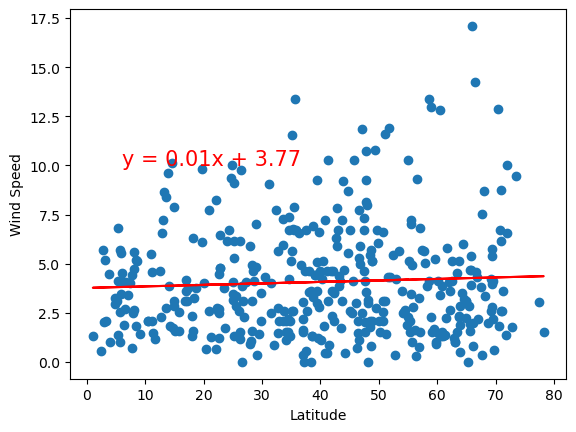

In [67]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"].astype("float")
y_values = northern_hemi_df["Wind Speed"].astype("float")

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

R squared: 0.06956505309758591


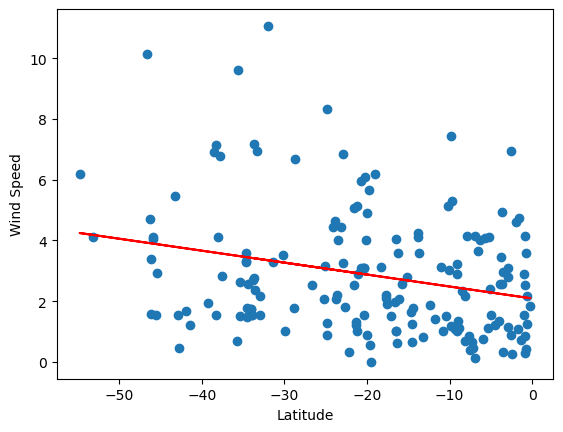

In [68]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"].astype("float")
y_values = southern_hemi_df["Wind Speed"].astype("float")

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** 
## RESPONSE:
A scatter plot was created by randomly selecting cities from the Northern and Southern hemispheres, mapping their Wind Speed levels against their latitudes. 

The plot showed that there was no observable relationship between the latitude of the cities and their Wind Speed levels. In other words, there was no correlation between the two variables.

Also, the R value on both Northern and Southern Hemisphere reflects no corelation between Wind Speed vs Latitude close to equator.